# Custom Display Logic Exercises

In [1]:
from IPython.display import display
from IPython.display import (
    display_png, display_html, display_latex,
    display_javascript, display_svg
)

## Circle class with custom display methods

Write a simple `MyCircle` Python class. Here is a skeleton to get you started:

```python
class MyCircle(object):
    def __init__(self, center=(0.0,0.0), radius=1.0, color='blue'):
        self.center = center
        self.radius = radius
        self.color = color
```

Now add special display methods to this class for the following representations (remember to wrap them in Python strings):

For HTML:

    &#x25CB;

For LaTeX (wrap with `$` and use a raw Python string):

    \bigcirc

For JavaScript:

    alert('I am a circle!');

After you write the class, create an instance and then use `display_html`, `display_svg`, `display_latex` and `display_javascript` to display those representations.

### Solution

Here is the solution to the simple `MyCircle` class:

In [2]:
# %load soln/mycircle.py
class MyCircle(object):

    def __init__(self, center=(0.0,0.0), radius=1.0, color='blue'):
        self.center = center
        self.radius = radius
        self.color = color

    def _repr_html_(self):
        return "&#x25CB; (<b>html</b>)"

    # Let's ignore that for now due to a bug in JupyterLab
    # def _repr_svg_(self):
    #     return """<svg width="100px" height="100px">
    #        <circle cx="50" cy="50" r="20" stroke="black" stroke-width="1" fill="blue"/>
    #     </svg>"""
    
    def _repr_latex_(self):
        return r"$\bigcirc \LaTeX$"


Now create an instance and use the display methods:

In [3]:
c = MyCircle()

In [4]:
display(c)

In [5]:
display_html(c)

○ ( html )

In [6]:
display_latex(c)

## PNG formatter for `MyCircle`

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

Now let's assume that the `MyCircle` class has already been defined and add a PNG representation using a formatter display function. Here is a function that converts a `MyCircle` instance to raw PNG data.

In [8]:
from IPython.core.pylabtools import print_figure

def circle_to_png(circle):
    """Render AnotherCircle to png data using matplotlib"""
    fig, ax = plt.subplots()
    patch = plt.Circle(circle.center,
                       radius=circle.radius,
                       fc=circle.color,
                       )
    ax.add_patch(patch)
    plt.axis('scaled')
    data = print_figure(fig, 'png')
    # We MUST close the figure, otherwise IPython's display machinery
    # will pick it up and send it as output, resulting in a double display
    plt.close(fig)
    return data

Now use the IPython API to get the PNG formatter (`image/png`) and call the `for_type` method to register `circle_to_png` as the display function for `MyCircle`.

In [9]:
# %load soln/mycircle_png.py
ip = get_ipython()
png_f = ip.display_formatter.formatters['image/png']
png_f.for_type(MyCircle, circle_to_png)

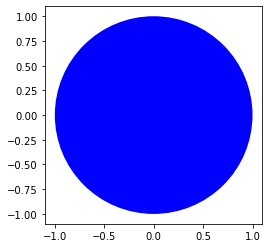

In [10]:
display_png(c)

## PNG formatter for NumPy arrays

In this exercise, you will register a display formatter function that generates a PNG representation of a 2d NumPy array. Here is the function that uses the [Python Imaging Library (PIL)](http://www.pythonware.com/products/pil/) to generate the raw PNG data:

In [11]:
from PIL import Image
from io import BytesIO
import numpy as np

def ndarray_to_png(x):
    if len(x.shape) != 2: return
    x = np.asarray(Image.fromarray(x).resize((500, 500)))
    x = (x - x.min()) / (x.max() - x.min())
    img = Image.fromarray((x*256).astype('uint8'))
    img_buffer = BytesIO()
    img.save(img_buffer, format='png')
    return img_buffer.getvalue()

Use the `for_type` method of the PNG formatter to register `ndarray_to_png` as the display function for `np.ndarray`.

In [ ]:
# %load soln/ndarray_png.py
ip = get_ipython()
png_f = ip.display_formatter.formatters['image/png']
png_f.for_type(np.ndarray, ndarray_to_png)

Now create a few NumPy arrays and display them. Notice that their default representation in the Notebook is PNG rather than text.

In [13]:
a = np.random.rand(100,100)

In [14]:
a

array([[0.10591235, 0.44135758, 0.71713213, ..., 0.24207891, 0.44310245,
        0.39768128],
       [0.78287679, 0.07835525, 0.22950414, ..., 0.1268507 , 0.72395196,
        0.90863684],
       [0.06953375, 0.08180363, 0.3070685 , ..., 0.49596587, 0.44201509,
        0.11463231],
       ...,
       [0.83092263, 0.64954293, 0.84515106, ..., 0.94897314, 0.4728368 ,
        0.23109622],
       [0.86802023, 0.39683741, 0.85644092, ..., 0.44169457, 0.57891443,
        0.49804828],
       [0.40126029, 0.68937401, 0.97249838, ..., 0.68401939, 0.66497568,
        0.17958038]])

You can still display the plain text representation using the `display_pretty` function.

In [15]:
from IPython.display import display_pretty

In [16]:
display_pretty(a)

array([[0.10591235, 0.44135758, 0.71713213, ..., 0.24207891, 0.44310245,
        0.39768128],
       [0.78287679, 0.07835525, 0.22950414, ..., 0.1268507 , 0.72395196,
        0.90863684],
       [0.06953375, 0.08180363, 0.3070685 , ..., 0.49596587, 0.44201509,
        0.11463231],
       ...,
       [0.83092263, 0.64954293, 0.84515106, ..., 0.94897314, 0.4728368 ,
        0.23109622],
       [0.86802023, 0.39683741, 0.85644092, ..., 0.44169457, 0.57891443,
        0.49804828],
       [0.40126029, 0.68937401, 0.97249838, ..., 0.68401939, 0.66497568,
        0.17958038]])

In [17]:
b = np.linspace(0,100.0, 100**2).reshape((100,100))

In [18]:
b

array([[0.00000000e+00, 1.00010001e-02, 2.00020002e-02, ...,
        9.70097010e-01, 9.80098010e-01, 9.90099010e-01],
       [1.00010001e+00, 1.01010101e+00, 1.02010201e+00, ...,
        1.97019702e+00, 1.98019802e+00, 1.99019902e+00],
       [2.00020002e+00, 2.01020102e+00, 2.02020202e+00, ...,
        2.97029703e+00, 2.98029803e+00, 2.99029903e+00],
       ...,
       [9.70097010e+01, 9.70197020e+01, 9.70297030e+01, ...,
        9.79797980e+01, 9.79897990e+01, 9.79998000e+01],
       [9.80098010e+01, 9.80198020e+01, 9.80298030e+01, ...,
        9.89798980e+01, 9.89898990e+01, 9.89999000e+01],
       [9.90099010e+01, 9.90199020e+01, 9.90299030e+01, ...,
        9.99799980e+01, 9.99899990e+01, 1.00000000e+02]])